In [ ]:
import numpy as np
import pandas as pd
import os

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.model_selection import train_test_split

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
df = pd.read_csv('fuel.csv')
df.head()

,EngDispl,NumCyl,Transmission,FE,AirAspirationMethod,NumGears,TransLockup,TransCreeperGear,DriveDesc,IntakeValvePerCyl,ExhaustValvesPerCyl,CarlineClassDesc,VarValveTiming,VarValveLift
0,4.7,8,AM6,28.0198,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
1,4.7,8,M6,25.6094,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
2,4.2,8,M6,26.8000,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
3,4.2,8,AM6,25.0451,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
4,5.2,10,AM6,24.8000,NaturallyAspirated,6,0,0,AllWheelDrive,2,2,2Seaters,1,0


In [ ]:
X = df.copy()
y = X.pop('FE')

In [ ]:
preprocessor = make_column_transformer(
    (StandardScaler(),
     make_column_selector(dtype_include=np.number)),
     (OneHotEncoder(sparse=False),
      make_column_selector(dtype_include=object)),
)

In [ ]:
X = preprocessor.fit_transform(X)
y = np.log(y)

In [ ]:
input_shape = [X.shape[1]]
print('Input shape: {}'.format(input_shape))

Input shape: [50]


In [ ]:
df.head()

,EngDispl,NumCyl,Transmission,FE,AirAspirationMethod,NumGears,TransLockup,TransCreeperGear,DriveDesc,IntakeValvePerCyl,ExhaustValvesPerCyl,CarlineClassDesc,VarValveTiming,VarValveLift
0,4.7,8,AM6,28.0198,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
1,4.7,8,M6,25.6094,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
2,4.2,8,M6,26.8000,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
3,4.2,8,AM6,25.0451,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
4,5.2,10,AM6,24.8000,NaturallyAspirated,6,0,0,AllWheelDrive,2,2,2Seaters,1,0


In [ ]:
pd.DataFrame(X[:10,:]).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.296693,2.120794,0.524148,-1.458464,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train = pd.DataFrame(X).sample(frac=0.7,random_state=0)
X_valid = pd.DataFrame(X).drop(X_train.index)

In [ ]:
y_train = pd.DataFrame(y).sample(frac=0.7,random_state=0)
y_valid = pd.DataFrame(y).drop(y_train.index)

In [ ]:
print(X_train.shape,X_valid.shape)

(775, 50) (332, 50)


In [ ]:
modelF= keras.Sequential([
                           layers.Dense(units=128, activation='relu', input_shape=[50]),
                           layers.Dense(units=128, activation='relu'),
                           layers.Dense(units=64, activation='relu'),
                           layers.Dense(units=1),
])

In [ ]:
modelF.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               6528      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 31,361
Trainable params: 31,361
Non-trainable params: 0
_________________________________________________________________


In [ ]:
modelF.compile(optimizer='adam',loss='mae')

In [ ]:
history = modelF.fit(
    X_train,y_train,
    validation_data=(X_valid,y_valid),
    batch_size=128,
    epochs=200,
)

Epoch 1/200
7/7 [==============================] - 1s 42ms/step - loss: 3.0467 - val_loss: 2.1987
Epoch 2/200
7/7 [==============================] - 0s 6ms/step - loss: 1.6322 - val_loss: 0.6628
Epoch 3/200
7/7 [==============================] - 0s 6ms/step - loss: 0.7673 - val_loss: 0.6934
Epoch 4/200
7/7 [==============================] - 0s 6ms/step - loss: 0.5301 - val_loss: 0.4504
Epoch 5/200
7/7 [==============================] - 0s 6ms/step - loss: 0.4019 - val_loss: 0.3176
Epoch 6/200
7/7 [==============================] - 0s 7ms/step - loss: 0.3147 - val_loss: 0.2365
Epoch 7/200
7/7 [==============================] - 0s 6ms/step - loss: 0.2471 - val_loss: 0.2225
Epoch 8/200
7/7 [==============================] - 0s 6ms/step - loss: 0.2018 - val_loss: 0.1868
Epoch 9/200
7/7 [==============================] - 0s 6ms/step - loss: 0.1622 - val_loss: 0.1808
Epoch 10/200
7/7 [==============================] - 0s 6ms/step - loss: 0.1521 - val_loss: 0.1610
Epoch 11/200
7/7 [==========

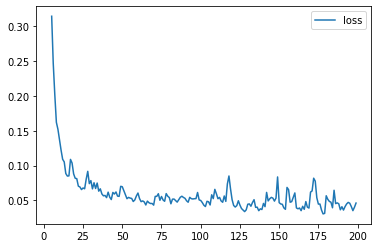

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[5:,['loss']].plot()

In [ ]:
modelRW.optimizer.lr

<tf.Variable 'Adam/learning_rate:0' shape=() dtype=float32, numpy=0.001>

In [ ]:
modelRW.optimizer.get_config()

{'amsgrad': False,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'decay': 0.0,
 'epsilon': 1e-07,
 'learning_rate': 0.001,
 'name': 'Adam'}